# Query session database

When you interact with protein-detective a session database is created to store the results of your queries. This notebook shows how to query that database.

This notebooks expects that you have run the [workflow.ipynb](workflow.ipynb) notebook first to create and fill the session database.

In [1]:
from pathlib import Path

from protein_detective.db import connect

Configure [%sql magic](https://jupysql.ploomber.io/en/latest/quick-start.html#querying) to use the session database.

In [2]:
session_dir = Path("session1")
# connect() is a context manager, to use connection over multiple cells, we cal its enter method directly.
conn = connect(session_dir, read_only=True).__enter__()

%load_ext sql
%sql conn
# %sql does not retain variable set in initialize_db(), so we use Python API for queries that need it.

Loading configurations from /home/verhoes/git/protein-detective/protein-detective/pyproject.toml.

Settings changed:

+--------------+-------+
|    Config    | value |
+--------------+-------+
| displaylimit |  100  |
+--------------+-------+

In [3]:
# Paths in the database are relative to the session directory.
# To make full paths, you need to prepend the session directory.
# The session directory is set as a variable in the database.

conn.execute("SELECT getvariable('session_dir')").fetchone()

('session1',)

## Uniprot search results

In [4]:
%sql SELECT * FROM proteins

Running query in 'DuckDBPyConnection'

+-------------+-------------+-----------------+----------+----------------------------------------------------------------------------+----------+--------------+
| uniprot_acc |  uniprot_id | sequence_length | reviewed |                                protein_name                                | taxon_id |  taxon_name  |
+-------------+-------------+-----------------+----------+----------------------------------------------------------------------------+----------+--------------+
|    A8K0S8   | ME3L2_HUMAN |       358       |   True   |                   Putative homeobox protein Meis3-like 2                   |   9606   | Homo sapiens |
|    O00358   | FOXE1_HUMAN |       373       |   True   |                          Forkhead box protein E1                           |   9606   | Homo sapiens |
|  A0A1B0GVZ6 | MB3LB_HUMAN |       204       |   True   |                Methyl-CpG-binding domain protein 3-like 2B                 |   9606   | Homo sapiens |
|    O00287   | RFXAP_HUMAN |       272       |   True   |                   Regulatory factor X-associated protein                   |   9606   | Homo sapiens |
|    O00479   | HMGN4_HUMAN |        90       |   True   |     High mobility group nucleosome-binding domain-containing protein 4     |   9606   | Homo sapiens |
|    O00321   |  ETV2_HUMAN |       342       |   True   |                        ETS translocation variant 2                         |   9606   | Homo sapiens |
|    O14503   | BHE40_HUMAN |       412       |   True   |                 Class E basic helix-loop-helix protein 40                  |   9606   | Homo sapiens |
|    B2RPK0   | HGB1A_HUMAN |       211       |   True   |                   High mobility group protein B1-like 1                    |   9606   | Homo sapiens |
|    A6NE82   | MB3L3_HUMAN |       208       |   True   |                 Methyl-CpG-binding domain protein 3-like 3                 |   9606   | Homo sapiens |
|    O00571   | DDX3X_HUMAN |       662       |   True   |                      ATP-dependent RNA helicase DDX3X                      |   9606   | Homo sapiens |
|    A6NLW8   |  DUXA_HUMAN |       204       |   True   |                         Double homeobox protein A                          |   9606   | Homo sapiens |
|  A0A2R8Y619 | H2BK1_HUMAN |       122       |   True   |                           Histone H2B type 2-K1                            |   9606   | Homo sapiens |
|  A0A2Z4LIS9 | FXO3B_HUMAN |       290       |   True   |                          Forkhead box protein O3B                          |   9606   | Homo sapiens |
|    E9PAV3   | NACAM_HUMAN |       2078      |   True   | Nascent polypeptide-associated complex subunit alpha, muscle-specific form |   9606   | Homo sapiens |
|    A6NN14   | ZN729_HUMAN |       1252      |   True   |                          Zinc finger protein 729                           |   9606   | Homo sapiens |
|    O14497   | ARI1A_HUMAN |       2285      |   True   |              AT-rich interactive domain-containing protein 1A              |   9606   | Homo sapiens |
|    A6NMT0   |  DBX1_HUMAN |       343       |   True   |                           Homeobox protein DBX1                            |   9606   | Homo sapiens |
|    A8MYZ6   | FOXO6_HUMAN |       492       |   True   |                          Forkhead box protein O6                           |   9606   | Homo sapiens |
|    A6NDX5   | ZN840_HUMAN |       716       |   True   |                          Zinc finger protein 840                           |   9606   | Homo sapiens |
|    A8MTQ0   |  NOTO_HUMAN |       251       |   True   |                         Homeobox protein notochord                         |   9606   | Homo sapiens |
|    O00255   |  MEN1_HUMAN |       610       |   True   |                                   Menin                                    |   9606   | Homo sapiens |
|    A6NJ46   | NKX63_HUMAN |       265       |   True   |                          Homeobox protein Nkx-6.3    

In [5]:
%sql SELECT * FROM pdbs

Running query in 'DuckDBPyConnection'

+--------+-----------------------+--------------------+----------------------------+
| pdb_id |         method        |     resolution     |         mmcif_file         |
+--------+-----------------------+--------------------+----------------------------+
|  1H3O  | X-Ray_Crystallography | 2.299999952316284  | downloads/pdbe/1h3o.cif.gz |
|  2P6V  | X-Ray_Crystallography |        2.0         | downloads/pdbe/2p6v.cif.gz |
|  6LTH  |  Electron_Microscopy  |        3.0         | downloads/pdbe/6lth.cif.gz |
|  6LTJ  |  Electron_Microscopy  | 3.700000047683716  | downloads/pdbe/6ltj.cif.gz |
|  1RYU  |    NMR_Spectroscopy   |        None        | downloads/pdbe/1ryu.cif.gz |
|  1WH6  |    NMR_Spectroscopy   |        None        | downloads/pdbe/1wh6.cif.gz |
|  1WH8  |    NMR_Spectroscopy   |        None        | downloads/pdbe/1wh8.cif.gz |
|  1X2L  |    NMR_Spectroscopy   |        None        | downloads/pdbe/1x2l.cif.gz |
|  3TX7  | X-Ray_Crystallography | 2.759999990463257  | downloads/pdbe/3tx7.cif.gz |
|  4DOS  | X-Ray_Crystallography |        2.0         | downloads/pdbe/4dos.cif.gz |
|  5UNJ  | X-Ray_Crystallography | 1.9600000381469727 | downloads/pdbe/5unj.cif.gz |
|  4PLE  | X-Ray_Crystallography |        1.75        | downloads/pdbe/4ple.cif.gz |
|  4DOR  | X-Ray_Crystallography | 1.899999976158142  | downloads/pdbe/4dor.cif.gz |
|  5L11  | X-Ray_Crystallography | 1.850000023841858  | downloads/pdbe/5l11.cif.gz |
|  3PLZ  | X-Ray_Crystallography |        1.75        | downloads/pdbe/3plz.cif.gz |
|  4ONI  | X-Ray_Crystallography | 1.7999999523162842 | downloads/pdbe/4oni.cif.gz |
|  1ZDU  | X-Ray_Crystallography |        2.5         | downloads/pdbe/1zdu.cif.gz |
|  1YUC  | X-Ray_Crystallography | 1.899999976158142  | downloads/pdbe/1yuc.cif.gz |
|  4PLD  | X-Ray_Crystallography |        1.75        | downloads/pdbe/4pld.cif.gz |
|  5L0M  | X-Ray_Crystallography | 2.200000047683716  | downloads/pdbe/5l0m.cif.gz |
|  5SYZ  | X-Ray_Crystallography | 1.9299999475479126 | downloads/pdbe/5syz.cif.gz |
|  4IS8  | X-Ray_Crystallography | 2.7799999713897705 | downloads/pdbe/4is8.cif.gz |
|  2A66  | X-Ray_Crystallography | 2.200000047683716  | downloads/pdbe/2a66.cif.gz |
|  1YOK  | X-Ray_Crystallography |        2.5         | downloads/pdbe/1yok.cif.gz |
|  4RWV  | X-Ray_Crystallography | 1.8600000143051147 | downloads/pdbe/4rwv.cif.gz |
|  5AFW  | X-Ray_Crystallography | 1.600000023841858  | downloads/pdbe/5afw.cif.gz |
|  2B2Y  | X-Ray_Crystallography | 2.3499999046325684 | downloads/pdbe/2b2y.cif.gz |
|  2B2U  | X-Ray_Crystallography | 2.950000047683716  | downloads/pdbe/2b2u.cif.gz |
|  2N39  |    NMR_Spectroscopy   |        None        | downloads/pdbe/2n39.cif.gz |
|  4O42  | X-Ray_Crystallography | 1.8700000047683716 | downloads/pdbe/4o42.cif.gz |
|  4B4C  | X-Ray_Crystallography | 1.6200000047683716 | downloads/pdbe/4b4c.cif.gz |
|  2B2V  | X-Ray_Crystallography | 2.6500000953674316 | downloads/pdbe/2b2v.cif.gz |
|  2B2T  | X-Ray_Crystallography | 2.450000047683716  | downloads/pdbe/2b2t.cif.gz |
|  4NW2  | X-Ray_Crystallography | 1.899999976158142  | downloads/pdbe/4nw2.cif.gz |
|  2B2W  | X-Ray_Crystallography | 2.4000000953674316 | downloads/pdbe/2b2w.cif.gz |
|  2JGN  | X-Ray_Crystallography | 1.909999966621399  | downloads/pdbe/2jgn.cif.gz |
|  4PXA  | X-Ray_Crystallography | 3.200000047683716  | downloads/pdbe/4pxa.cif.gz |
|  5E7J  | X-Ray_Crystallography | 2.2300000190734863 | downloads/pdbe/5e7j.cif.gz |
|  4O2E  | X-Ray_Crystallography | 1.9800000190734863 | downloads/pdbe/4o2e.cif.gz |
|  3JRV  | X-Ray_Crystallography | 1.600000023841858  | downloads/pdbe/3jrv.cif.gz |
|  2I4I  | X-Ray_Crystallography | 2.200000047683716  | downloads/pdbe/2i4i.cif.gz |
|  5E7M  | X-Ray_Crystallography | 2.299999952316284  | downloads/pdbe/5e7m.cif.gz |
|  4O2C  | X-Ray_Crystallography | 1.7999999523162842 | downloads/pdbe/4o2c.cif.gz |
|  6CZ5  | X-Ray_Crystallography |        3.0         | downloads/pdbe/6cz5.cif.gz |
|  4P

In [6]:
%sql SELECT * FROM proteins_pdbs

Running query in 'DuckDBPyConnection'

+-------------+--------+----------------------------------------------+-------+
| uniprot_acc | pdb_id |                uniprot_chains                | chain |
+-------------+--------+----------------------------------------------+-------+
|    O00268   |  1H3O  |                 A/C=872-945                  |   A   |
|    O00268   |  2P6V  |                  A=575-688                   |   A   |
|    O14497   |  6LTH  |                   L=1-2285                   |   L   |
|    O14497   |  6LTJ  |                  L=991-2285                  |   L   |
|    O14497   |  1RYU  |                 A=1000-1119                  |   A   |
|    O14529   |  1WH6  |                  A=887-974                   |   A   |
|    O14529   |  1WH8  |                 A=1028-1125                  |   A   |
|    O14529   |  1X2L  |                  A=544-631                   |   A   |
|    O00482   |  3TX7  |                  B=191-541                   |   B   |
|    O00482   |  4DOS  |                  A=299-538                   |   A   |
|    O00482   |  5UNJ  |                  A=299-541                   |   A   |
|    O00482   |  4PLE  |               A/C/E/G=301-541                |   A   |
|    O00482   |  4DOR  |                 A/B=290-541                  |   A   |
|    O00482   |  5L11  |                  A=299-541                   |   A   |
|    O00482   |  3PLZ  |                 A/B=300-541                  |   A   |
|    O00482   |  4ONI  |                 A/B=291-541                  |   A   |
|    O00482   |  1ZDU  |                  A=297-541                   |   A   |
|    O00482   |  1YUC  |                 A/B=290-541                  |   A   |
|    O00482   |  4PLD  |                  A=301-541                   |   A   |
|    O00482   |  5L0M  |                   A=79-187                   |   A   |
|    O00482   |  5SYZ  |                  A=297-538                   |   A   |
|    O00482   |  4IS8  |                 A/B=300-538                  |   A   |
|    O00482   |  2A66  |                   A=79-187                   |   A   |
|    O00482   |  1YOK  |                  A=300-541                   |   A   |
|    O00482   |  4RWV  |                  A=294-541                   |   A   |
|    O14646   |  5AFW  |                  A=270-443                   |   A   |
|    O14646   |  2B2Y  |            A/B=268-443,C=268-373             |   A   |
|    O14646   |  2B2U  |            C=268-373,A/B=268-443             |   C   |
|    O14646   |  2N39  |                 A=1409-1511                  |   A   |
|    O14646   |  4O42  |                  A=268-443                   |   A   |
|    O14646   |  4B4C  |                 A=1119-1327                  |   A   |
|    O14646   |  2B2V  |            C=268-373,A/B=268-443             |   C   |
|    O14646   |  2B2T  |            C=268-373,A/B=268-443             |   C   |
|    O14646   |  4NW2  |                 A/C=268-443                  |   A   |
|    O14646   |  2B2W  |            C=268-373,A/B=268-443             |   C   |
|    O00571   |  2JGN  |                A/B/C=409-580                 |   A   |
|    O00571   |  4PXA  |                  A=135-582                   |   A   |
|    O00571   |  5E7J  |                  A=133-584                   |   A   |
|    O00571   |  4O2E  |                   C/F=2-10                   |   C   |
|    O00571   |  3JRV  |                 C/D/E=71-90                  |   C   |
|    O00571   |  2I4I  |                  A=168-582                   |   A   |
|    O00571   |  5E7M  |                  A=133-584                   |   A   |
|    O00571   |  4O2C  |                    C=2-10                    |   C   |
|    O00571   |  6CZ5  |                  A=132-607                   |   A   |
|    O00571   |  4PX9  |                A/B/C=135-407                 |   A   |
|    O00571   |  5E7I  |                A/B/C=133-584                 |   A   |
|    O00571   |  4O2F  |                   C/F=3-10                   |   C   |


In [7]:
%sql SELECT * FROM alphafolds LIMIT 1

Running query in 'DuckDBPyConnection'

+-------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------+------------------------------------------------------+----------+--------------+---------------------+--------------------------+--------------------------+----------+----------------+
| uniprot_acc |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              summary                                                                                                                                                                                                                                                                                                                                                                                                                  

In [8]:
%sql SELECT count(*) FROM alphafolds

Running query in 'DuckDBPyConnection'

+--------------+
| count_star() |
+--------------+
|     100      |
+--------------+

In [9]:
# Fetch fields from inside summary
%sql SELECT uniprot_acc, summary.taxId, summary.gene, summary.organismScientificName FROM alphafolds

Running query in 'DuckDBPyConnection'

+-------------+-------+------------+------------------------+
| uniprot_acc | taxId |    gene    | organismScientificName |
+-------------+-------+------------+------------------------+
|  A0A087WUV0 |  9606 |  "ZNF892"  |     "Homo sapiens"     |
|  A0A0C5B5G6 |  9606 | "MT-RNR1"  |     "Homo sapiens"     |
|  A0A0U1RQI7 |  9606 |  "KLF18"   |     "Homo sapiens"     |
|  A0A1B0GTS1 |  9606 |  "HSFX4"   |     "Homo sapiens"     |
|  A0A1B0GVZ6 |  9606 | "MBD3L2B"  |     "Homo sapiens"     |
|  A0A1B0GWH4 |  9606 |  "HSFX3"   |     "Homo sapiens"     |
|  A0A1W2PPF3 |  9606 |   "DUXB"   |     "Homo sapiens"     |
|  A0A1W2PPK0 |  9606 |  "CPHXL2"  |     "Homo sapiens"     |
|  A0A1W2PPM1 |  9606 |  "CPHXL"   |     "Homo sapiens"     |
|  A0A1W2PQ73 |  9606 |   "ERFL"   |     "Homo sapiens"     |
|  A0A1W2PQL4 |  9606 |  "ZNF722"  |     "Homo sapiens"     |
|  A0A1W2PRP0 |  9606 |  "FOXL3"   |     "Homo sapiens"     |
|  A0A2R8Y619 |  9606 |  "H2BK1"   |     "Homo sapiens"     |
|  A0A2Z4LIS9 |  9606 |  "FOXO3B"  |     "Homo sapiens"     |
|  A0A3B3IU63 |  9606 |  "H2AL3"   |     "Homo sapiens"     |
|  A0A5F9ZHS7 |  9606 |  "NFILZ"   |     "Homo sapiens"     |
|    A1A519   |  9606 | "FAM170A"  |     "Homo sapiens"     |
|    A1YPR0   |  9606 |  "ZBTB7C"  |     "Homo sapiens"     |
|    A2RRD8   |  9606 |  "ZNF320"  |     "Homo sapiens"     |
|    A2RU54   |  9606 |   "HMX2"   |     "Homo sapiens"     |
|    A3KN83   |  9606 |  "SBNO1"   |     "Homo sapiens"     |
|    A6NCS4   |  9606 |  "NKX2-6"  |     "Homo sapiens"     |
|    A6NDR6   |  9606 | "MEIS3P1"  |     "Homo sapiens"     |
|    A6NDX5   |  9606 | "ZNF840P"  |     "Homo sapiens"     |
|    A6NDZ8   |  9606 |  "MBD3L4"  |     "Homo sapiens"     |
|    A6NE82   |  9606 |  "MBD3L3"  |     "Homo sapiens"     |
|    A6NFD8   |  9606 |   "HELT"   |     "Homo sapiens"     |
|    A6NFI3   |  9606 |  "ZNF316"  |     "Homo sapiens"     |
|    A6NFQ7   |  9606 |   "DPRX"   |     "Homo sapiens"     |
|    A6NGD5   |  9606 | "ZSCAN5C"  |     "Homo sapiens"     |
|    A6NHJ4   |  9606 |  "ZNF860"  |     "Homo sapiens"     |
|    A6NHT5   |  9606 |   "HMX3"   |     "Homo sapiens"     |
|    A6NI15   |  9606 |  "MSGN1"   |     "Homo sapiens"     |
|    A6NJ08   |  9606 |  "MBD3L5"  |     "Homo sapiens"     |
|    A6NJ46   |  9606 |  "NKX6-3"  |     "Homo sapiens"     |
|    A6NJG6   |  9606 |  "ARGFX"   |     "Homo sapiens"     |
|    A6NJL1   |  9606 | "ZSCAN5B"  |     "Homo sapiens"     |
|    A6NJT0   |  9606 |   "UNCX"   |     "Homo sapiens"     |
|    A6NK53   |  9606 |  "ZNF233"  |     "Homo sapiens"     |
|    A6NK75   |  9606 |  "ZNF98"   |     "Homo sapiens"     |
|    A6NKF2   |  9606 |  "ARID3C"  |     "Homo sapiens"     |
|    A6NLW8   |  9606 |   "DUXA"   |     "Homo sapiens"     |
|    A6NM28   |  9606 |  "ZFP92"   |     "Homo sapiens"     |
|    A6NMT0   |  9606 |   "DBX1"   |     "Homo sapiens"     |
|    A6NN14   |  9606 |  "ZNF729"  |     "Homo sapiens"     |
|    A6NNA5   |  9606 |   "DRGX"   |     "Homo sapiens"     |
|    A6NNF4   |  9606 |  "ZNF726"  |     "Homo sapiens"     |
|    A6NP11   |  9606 |  "ZNF716"  |     "Homo sapiens"     |
|    A8K0S8   |  9606 | "MEIS3P2"  |     "Homo sapiens"     |
|    A8K830   |  9606 | "POU2AF3"  |     "Homo sapiens"     |
|    A8K8V0   |  9606 |  "ZNF785"  |     "Homo sapiens"     |
|    A8MPP1   |  9606 | "DDX11L8"  |     "Homo sapiens"     |
|    A8MQ14   |  9606 |  "ZNF850"  |     "Homo sapiens"     |
|    A8MT65   |  9606 |  "ZNF891"  |     "Homo sapiens"     |
|    A8MT69   |  9606 |  "CENPX"   |     "Homo sapiens"     |
|    A8MTJ6   |  9606 |  "FOXI3"   |     "Homo sapiens"     |
|    A8MTQ0   |  9606 |   "NOTO"   |     "Homo sapiens"     |
|    A8MTY0   |  9606 |  "ZNF724"  |     "Homo sapiens"     |
|    A8MUV8   |  9606 |  "ZNF727"  |     "Homo sapiens"     |
|    A8MUZ8   |  9606 | "ZNF705G"  |     "Homo sapiens"     |
|    A8MWA4   |  9606 | "ZNF705EP" |     "Homo sapiens"     |
|    A8MXY4   |  9606 |  "ZNF99"

Sequence length of Uniprot protein and alphafold entry

In [11]:
%%sql 
SELECT uniprot_acc, 
proteins.sequence_length,
summary.sequenceStart, summary.sequenceEnd
FROM proteins 
JOIN alphafolds USING (uniprot_acc)
LIMIT 10

Running query in 'DuckDBPyConnection'

+-------------+-----------------+---------------+-------------+
| uniprot_acc | sequence_length | sequenceStart | sequenceEnd |
+-------------+-----------------+---------------+-------------+
|  A0A087WUV0 |       522       |       1       |     522     |
|  A0A0C5B5G6 |        16       |       1       |      16     |
|  A0A0U1RQI7 |       1052      |       1       |     1052    |
|  A0A1B0GTS1 |       333       |       1       |     333     |
|  A0A1B0GVZ6 |       204       |       1       |     204     |
|  A0A1B0GWH4 |       333       |       1       |     333     |
|  A0A1W2PPF3 |       345       |       1       |     345     |
|  A0A1W2PPK0 |       400       |       1       |     400     |
|  A0A1W2PPM1 |       405       |       1       |     405     |
|  A0A1W2PQ73 |       354       |       1       |     354     |
+-------------+-----------------+---------------+-------------+

## Density filtered models

In [10]:
%%sql
SELECT 
f.confidence, f.min_threshold, f.max_threshold,
density_filtered_alphafolds.*, 
alphafolds.summary.uniprotStart, 
alphafolds.summary.uniprotEnd, 
length(alphafolds.summary.uniprotSequence) AS uniprot_length
FROM density_filtered_alphafolds
JOIN density_filters  AS f USING (density_filter_id) 
JOIN alphafolds USING (uniprot_acc)
LIMIT 100;

Running query in 'DuckDBPyConnection'

+------------+---------------+---------------+-------------------+-------------+------------------------------+-------+------------------------------------------------+--------------+------------+----------------+
| confidence | min_threshold | max_threshold | density_filter_id | uniprot_acc | nr_residues_above_confidence |  keep |                    pdb_file                    | uniprotStart | uniprotEnd | uniprot_length |
+------------+---------------+---------------+-------------------+-------------+------------------------------+-------+------------------------------------------------+--------------+------------+----------------+
|    70.0    |      100      |      500      |         1         |  A0A087WUV0 |             283              |  True | density_filtered/AF-A0A087WUV0-F1-model_v4.pdb |      1       |    522     |      524       |
|    70.0    |      100      |      500      |         1         |  A0A0C5B5G6 |              10              | False |                      None                      |      1       |     16     |       18       |
|    70.0    |      100      |      500      |         1         |  A0A0U1RQI7 |             192              |  True | density_filtered/AF-A0A0U1RQI7-F1-model_v4.pdb |      1       |    1052    |      1054      |
|    70.0    |      100      |      500      |         1         |  A0A1B0GTS1 |             116              |  True | density_filtered/AF-A0A1B0GTS1-F1-model_v4.pdb |      1       |    333     |      335       |
|    70.0    |      100      |      500      |         1         |  A0A1B0GVZ6 |              54              | False |                      None                      |      1       |    204     |      206       |
|    70.0    |      100      |      500      |         1         |  A0A1B0GWH4 |             117              |  True | density_filtered/AF-A0A1B0GWH4-F1-model_v4.pdb |      1       |    333     |      335       |
|    70.0    |      100      |      500      |         1         |  A0A1W2PPF3 |             124              |  True | density_filtered/AF-A0A1W2PPF3-F1-model_v4.pdb |      1       |    345     |      347       |
|    70.0    |      100      |      500      |         1         |  A0A1W2PPK0 |              71              | False |                      None                      |      1       |    400     |      402       |
|    70.0    |      100      |      500      |         1         |  A0A1W2PPM1 |              68              | False |                      None                      |      1       |    405     |      407       |
|    70.0    |      100      |      500      |         1         |  A0A1W2PQ73 |              86              | False |                      None                      |      1       |    354     |      356       |
|    70.0    |      100      |      500      |         1         |  A0A1W2PQL4 |             226              |  True | density_filtered/AF-A0A1W2PQL4-F1-model_v4.pdb |      1       |    384     |      386       |
|    70.0    |      100      |      500      |         1         |  A0A1W2PRP0 |              94              | False |                      None                      |      1       |    233     |      235       |
|    70.0    |      100      |      500      |         1         |  A0A2R8Y619 |              92              | False |                      None                      |      1       |    122     |      124       |
|    70.0    |      100      |      500      |         1         |  A0A2Z4LIS9 |              52              | False |                      None                      |      1       |    290     |      292       |
|    70.0    |      100      |      500      |         1         |  A0A3B3IU63 |              92              | False |                      None                      |      1       |    148     |      150       |
|    70.0    |      100      |      500      |         1         |  A0A5F9ZHS7 |              71              | False |                      None   

## Powerfit

In [11]:
result = %sql SELECT powerfit_run_id, options.target, options.resolution FROM powerfit_runs;

Running query in 'DuckDBPyConnection'

In [12]:
result

+-----------------+---------------------------------------------+------------+
| powerfit_run_id |                    target                   | resolution |
+-----------------+---------------------------------------------+------------+
|        1        | "../../powerfit-tutorial/ribosome-KsgA.map" |     13     |
+-----------------+---------------------------------------------+------------+

In [13]:
%%sql 
SELECT density_filter_id, uniprot_acc, pdb_file, 
parse_filename(pdb_file, true) AS pdb_filename 
FROM density_filtered_alphafolds WHERE keep=True

Running query in 'DuckDBPyConnection'

+-------------------+-------------+------------------------------------------------+---------------------------+
| density_filter_id | uniprot_acc |                    pdb_file                    |        pdb_filename       |
+-------------------+-------------+------------------------------------------------+---------------------------+
|         1         |  A0A087WUV0 | density_filtered/AF-A0A087WUV0-F1-model_v4.pdb | AF-A0A087WUV0-F1-model_v4 |
|         1         |  A0A0U1RQI7 | density_filtered/AF-A0A0U1RQI7-F1-model_v4.pdb | AF-A0A0U1RQI7-F1-model_v4 |
|         1         |  A0A1B0GTS1 | density_filtered/AF-A0A1B0GTS1-F1-model_v4.pdb | AF-A0A1B0GTS1-F1-model_v4 |
|         1         |  A0A1B0GWH4 | density_filtered/AF-A0A1B0GWH4-F1-model_v4.pdb | AF-A0A1B0GWH4-F1-model_v4 |
|         1         |  A0A1W2PPF3 | density_filtered/AF-A0A1W2PPF3-F1-model_v4.pdb | AF-A0A1W2PPF3-F1-model_v4 |
|         1         |  A0A1W2PQL4 | density_filtered/AF-A0A1W2PQL4-F1-model_v4.pdb | AF-A0A1W2PQL4-F1-model_v4 |
|         1         |    A1YPR0   |   density_filtered/AF-A1YPR0-F1-model_v4.pdb   |   AF-A1YPR0-F1-model_v4   |
|         1         |    A2RRD8   |   density_filtered/AF-A2RRD8-F1-model_v4.pdb   |   AF-A2RRD8-F1-model_v4   |
|         1         |    A6NDX5   |   density_filtered/AF-A6NDX5-F1-model_v4.pdb   |   AF-A6NDX5-F1-model_v4   |
|         1         |    A6NFD8   |   density_filtered/AF-A6NFD8-F1-model_v4.pdb   |   AF-A6NFD8-F1-model_v4   |
|         1         |    A6NFI3   |   density_filtered/AF-A6NFI3-F1-model_v4.pdb   |   AF-A6NFI3-F1-model_v4   |
|         1         |    A6NGD5   |   density_filtered/AF-A6NGD5-F1-model_v4.pdb   |   AF-A6NGD5-F1-model_v4   |
|         1         |    A6NHJ4   |   density_filtered/AF-A6NHJ4-F1-model_v4.pdb   |   AF-A6NHJ4-F1-model_v4   |
|         1         |    A6NJL1   |   density_filtered/AF-A6NJL1-F1-model_v4.pdb   |   AF-A6NJL1-F1-model_v4   |
|         1         |    A6NJT0   |   density_filtered/AF-A6NJT0-F1-model_v4.pdb   |   AF-A6NJT0-F1-model_v4   |
|         1         |    A6NK53   |   density_filtered/AF-A6NK53-F1-model_v4.pdb   |   AF-A6NK53-F1-model_v4   |
|         1         |    A6NK75   |   density_filtered/AF-A6NK75-F1-model_v4.pdb   |   AF-A6NK75-F1-model_v4   |
|         1         |    A6NKF2   |   density_filtered/AF-A6NKF2-F1-model_v4.pdb   |   AF-A6NKF2-F1-model_v4   |
|         1         |    A6NLW8   |   density_filtered/AF-A6NLW8-F1-model_v4.pdb   |   AF-A6NLW8-F1-model_v4   |
|         1         |    A6NM28   |   density_filtered/AF-A6NM28-F1-model_v4.pdb   |   AF-A6NM28-F1-model_v4   |
|         1         |    A6NP11   |   density_filtered/AF-A6NP11-F1-model_v4.pdb   |   AF-A6NP11-F1-model_v4   |
|         1         |    A8K0S8   |   density_filtered/AF-A8K0S8-F1-model_v4.pdb   |   AF-A8K0S8-F1-model_v4   |
|         1         |    A8K8V0   |   density_filtered/AF-A8K8V0-F1-model_v4.pdb   |   AF-A8K8V0-F1-model_v4   |
|         1         |    A8MT65   |   density_filtered/AF-A8MT65-F1-model_v4.pdb   |   AF-A8MT65-F1-model_v4   |
|         1         |    A8MTY0   |   density_filtered/AF-A8MTY0-F1-model_v4.pdb   |   AF-A8MTY0-F1-model_v4   |
|         1         |    A8MUV8   |   density_filtered/AF-A8MUV8-F1-model_v4.pdb   |   AF-A8MUV8-F1-model_v4   |
|         1         |    A8MUZ8   |   density_filtered/AF-A8MUZ8-F1-model_v4.pdb   |   AF-A8MUZ8-F1-model_v4   |
|         1         |    A8MWA4   |   density_filtered/AF-A8MWA4-F1-model_v4.pdb   |   AF-A8MWA4-F1-model_v4   |
|         1         |    A9YTQ3   |   density_filtered/AF-A9YTQ3-F1-model_v4.pdb   |   AF-A9YTQ3-F1-model_v4   |
|         1         |    B2RPK0   |   density_filtered/AF-B2RPK0-F1-model_v4.pdb   |   AF-B2RPK0-F1-model_v4   |
|         1         |    B4DU55   |   density_filtered/AF-B4DU55-F1-model_v4.pdb   |   AF-B4DU55-F1-model_v4   |
|         1         |    B4DX44   |   density_filtered/AF-B4DX44-F1-model_v4.pdb   |   AF-B4DX44-F1-model_v4   |
+-------------------+-------------+----------

In [14]:
%%sql
SELECT uniprot_acc, pdb_id, single_chain_pdb_file, 
parse_filename(single_chain_pdb_file, true) AS structure
    FROM proteins_pdbs
    WHERE single_chain_pdb_file IS NOT NULL 

Running query in 'DuckDBPyConnection'

+-------------+--------+----------------------------------+-----------------+
| uniprot_acc | pdb_id |      single_chain_pdb_file       |    structure    |
+-------------+--------+----------------------------------+-----------------+
|    A8MT69   |  7YWX  | single_chain/A8MT69_7ywx_X2A.pdb | A8MT69_7ywx_X2A |
|    A8MT69   |  4NE5  | single_chain/A8MT69_4ne5_B2A.pdb | A8MT69_4ne5_B2A |
|    A8MT69   |  4E45  | single_chain/A8MT69_4e45_B2A.pdb | A8MT69_4e45_B2A |
|    A8MT69   |  4NDY  | single_chain/A8MT69_4ndy_B2A.pdb | A8MT69_4ndy_B2A |
|    A8MT69   |  4NE3  | single_chain/A8MT69_4ne3_B2A.pdb | A8MT69_4ne3_B2A |
|    A8MT69   |  4E44  | single_chain/A8MT69_4e44_B2A.pdb | A8MT69_4e44_B2A |
|    A8MT69   |  4NE6  | single_chain/A8MT69_4ne6_B2A.pdb | A8MT69_4ne6_B2A |
|    A8MT69   |  7R5S  | single_chain/A8MT69_7r5s_X2A.pdb | A8MT69_7r5s_X2A |
|    A8MT69   |  7XHN  | single_chain/A8MT69_7xhn_X2A.pdb | A8MT69_7xhn_X2A |
|    A8MT69   |  7XHO  | single_chain/A8MT69_7xho_X2A.pdb | A8MT69_7xho_X2A |
|    A8MT69   |  4DRA  | single_chain/A8MT69_4dra_E2A.pdb | A8MT69_4dra_E2A |
|    A8MT69   |  4NE1  | single_chain/A8MT69_4ne1_B2A.pdb | A8MT69_4ne1_B2A |
|    A8MT69   |  4DRB  | single_chain/A8MT69_4drb_J2A.pdb | A8MT69_4drb_J2A |
|    A9YTQ3   |  5Y7Y  | single_chain/A9YTQ3_5y7y_A2A.pdb | A9YTQ3_5y7y_A2A |
+-------------+--------+----------------------------------+-----------------+

In [15]:
from protein_detective.db import powerfit_solutions

In [16]:
df = powerfit_solutions(conn)
df

powerfit_run_id              structure  rank     cc  fishz    relz  \
0                   1        A8MT69_4ne6_B2A     1  0.456  0.492  11.071   
1                   1        A8MT69_4drb_J2A     1  0.444  0.477  10.588   
2                   1        A8MT69_4dra_E2A     1  0.443  0.476  10.402   
3                   1        A8MT69_4e44_B2A     1  0.440  0.472  10.099   
4                   1        A8MT69_7xhn_X2A     1  0.439  0.471  10.136   
...               ...                    ...   ...    ...    ...     ...   
62752               1  AF-A8MTY0-F1-model_v4  1463  0.095  0.095   5.424   
62753               1  AF-A8MTY0-F1-model_v4  1462  0.095  0.095   5.425   
62754               1  AF-A8MTY0-F1-model_v4  1461  0.095  0.095   5.429   
62755               1  AF-A8MTY0-F1-model_v4  1460  0.095  0.096   5.437   
62756               1  AF-A8MTY0-F1-model_v4  1459  0.095  0.096   5.445   

                    translation  \
0      [227.18, 242.53, 211.83]   
1       [227.18, 242.53, 214.9]   
2        [214.9, 187.27, 214.9]   
3      [224.11, 236.39, 227.18]   
4      [230.25, 242.53, 217.97]   
...                         ...   
62752  [168.85, 202.62, 236.39]   
62753   [122.8, 174.99, 147.36]   
62754  [150.43, 211.83, 104.38]   
62755  [224.11, 282.44, 150.43]   
62756  [196.48, 196.48, 273.23]   

                                                rotation  density_filter_id  \
0      [0.0, -0.0, -1.0, 0.604, -0.797, 0.0, -0.797, ...               <NA>   
1      [0.797, -0.604, 0.0, 0.604, 0.797, 0.0, 0.0, 0...               <NA>   
2      [1.0, -0.0, 0.0, 0.0, -0.0, 1.0, -0.0, -1.0, -...               <NA>   
3          [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]               <NA>   
4        [-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0]               <NA>   
...                                                  ...                ...   
62752  [0.0, 1.0, 0.0, 0.797, 0.0, -0.604, -0.604, 0....                  1   
62753  [0.797, 0.604, 0.0, 0.604, -0.797, 0.0, 0.0, 0...                  1   
62754  [0.548, 0.548, 0.632, 0.184, -0.816, 0.548, 0....                  1   
62755  [0.0, 0.797, 0.604, -1.0, 0.0, -0.0, 0.0, -0.6...                  1   
62756  [0.548, 0.548, 0.632, 0.184, -0.816, 0.548, 0....                  1   

        af_id pdb_id                                           pdb_file  \
0        None   4NE6          session1/single_chain/A8MT69_4ne6_B2A.pdb   
1        None   4DRB          session1/single_chain/A8MT69_4drb_J2A.pdb   
2        None   4DRA          session1/single_chain/A8MT69_4dra_E2A.pdb   
3        None   4E44          session1/single_chain/A8MT69_4e44_B2A.pdb   
4        None   7XHN          session1/single_chain/A8MT69_7xhn_X2A.pdb   
...       ...    ...                                                ...   
62752  A8MTY0   None  session1/density_filtered/AF-A8MTY0-F1-model_v...   
62753  A8MTY0   None  session1/density_filtered/AF-A8MTY0-F1-model_v...   
62754  A8MTY0   None  session1/density_filtered/AF-A8MTY0-F1-model_v...   
62755  A8MTY0   None  session1/density_filtered/AF-A8MTY0-F1-model_v...   
62756  A8MTY0   None  session1/density_filtered/AF-A8MTY0-F1-model_v...   

      uniprot_acc  
0          A8MT69  
1          A8MT69  
2          A8MT69  
3          A8MT69  
4          A8MT69  
...           ...  
62752      A8MTY0  
62753      A8MTY0  
62754      A8MTY0  
62755      A8MTY0  
62756      A8MTY0  

[62757 rows x 13 columns]

<Axes: title={'center': 'Histogram of CC Values'}, ylabel='Frequency'>

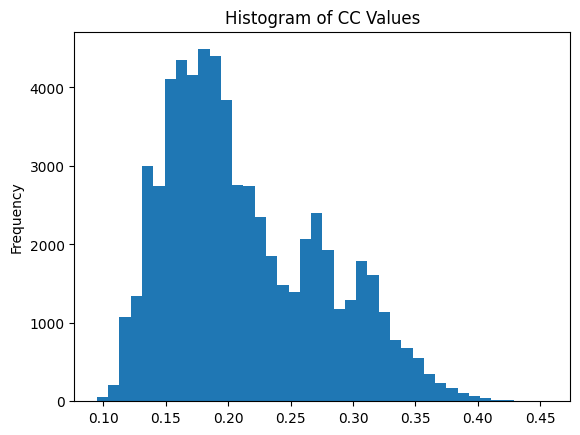

In [17]:
df["cc"].plot(kind="hist", title="Histogram of CC Values", bins=40)

Show the top fitted models and their scores.

In [ ]:
conn.execute("""
    SELECT
        f.* EXCLUDE (unfitted_model_file),
        s.* EXCLUDE (pdb_file),
        coalesce(f.unfitted_model_file, s.pdb_file) AS unfitted_model_file,
    FROM fitted_models AS f
    JOIN solutions AS s USING (powerfit_run_id, structure, rank)""").df()

powerfit_run_id        structure  rank  \
0                1  A8MT69_4ne6_B2A     1   
1                1  A8MT69_4ne6_B2A     2   
2                1  A8MT69_4ne6_B2A     3   
3                1  A8MT69_4ne6_B2A     4   
4                1  A8MT69_4ne6_B2A     5   

                               fitted_model_file powerfit_run_id_1  \
0  session1/powerfit/1/A8MT69_4ne6_B2A/fit_1.pdb                 1   
1  session1/powerfit/1/A8MT69_4ne6_B2A/fit_2.pdb                 1   
2  session1/powerfit/1/A8MT69_4ne6_B2A/fit_3.pdb                 1   
3  session1/powerfit/1/A8MT69_4ne6_B2A/fit_4.pdb                 1   
4  session1/powerfit/1/A8MT69_4ne6_B2A/fit_5.pdb                 1   

       structure_1  rank_1     cc  fishz    relz               translation  \
0  A8MT69_4ne6_B2A       1  0.456  0.492  11.071  [227.18, 242.53, 211.83]   
1  A8MT69_4ne6_B2A       2  0.438  0.470  10.571   [138.15, 153.5, 138.15]   
2  A8MT69_4ne6_B2A       3  0.428  0.457  10.297  [227.18, 138.15, 227.18]   
3  A8MT69_4ne6_B2A       4  0.407  0.432   9.720    [276.3, 248.67, 153.5]   
4  A8MT69_4ne6_B2A       5  0.399  0.422   9.498   [184.2, 190.34, 205.69]   

                                            rotation  density_filter_id af_id  \
0  [0.0, -0.0, -1.0, 0.604, -0.797, 0.0, -0.797, ...               <NA>  None   
1  [-0.797, 0.604, 0.0, 0.604, 0.797, 0.0, 0.0, 0...               <NA>  None   
2   [-0.0, 0.0, 1.0, 0.0, 1.0, 0.0, -1.0, 0.0, -0.0]               <NA>  None   
3      [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]               <NA>  None   
4  [0.816, 0.548, 0.184, -0.184, 0.548, -0.816, -...               <NA>  None   

  pdb_id uniprot_acc                        unfitted_model_file  
0   4NE6      A8MT69  session1/single_chain/A8MT69_4ne6_B2A.pdb  
1   4NE6      A8MT69  session1/single_chain/A8MT69_4ne6_B2A.pdb  
2   4NE6      A8MT69  session1/single_chain/A8MT69_4ne6_B2A.pdb  
3   4NE6      A8MT69  session1/single_chain/A8MT69_4ne6_B2A.pdb  
4   4NE6      A8MT69  session1/single_chain/A8MT69_4ne6_B2A.pdb